# A1 Problems

### Problem 1

First we have four points:

$$f(x\pm \delta)$$ and $$f(x \pm 2\delta)$$

We want to figure out an estimate of the first derivative of $x$, $f'(x)$, should be.

Let's Taylor expand in the variable $\delta$ about the point $x$:

$$f(x\pm \delta) \approx f(x) \pm f'(x) \delta + \frac{1}{2} f''(x) \delta^2 \pm \frac{1}{6}f'''(x)\delta^3 + ...$$
$$f(x\pm 2\delta) \approx f(x) \pm 2 f'(x) \delta + 2 f''(x) \delta^2 \pm \frac{8}{6} f'''(x)\delta^3 + ...$$

Recall our goal is to recover $f'(x)$, and we know in theory the points $f(x\pm \delta)$ and $f(x \pm 2\delta)$. My strategy is to put a coefficient on each of these equations (I'll call them A, B, C, and D) and then solve for A, B, C, and D under the condition that the only remaining terms are the known points and the term with the first derivative. Putting this in action:

$$Af(x+\delta) + B f(x-\delta) + C f(x+2\delta) + D f(x-2\delta) = (A+B+C+D) f(x) + (A-B+2C-2D) f'(x) \delta + (A/2 + B/2 + 2C + 2D) f''(x)\delta^2 + (A/6 - B/6 + 8C/6 - 8D/6) f'''(x) \delta^3 + ... $$

We can solve for the coefficients using the conditions we set before:

$$A + B+ C +D = 0$$ $$A - B + 2C - 2D = 1$$ $$A/2 + B/2 + 2C + 2D = 0$$ $$A/6 - B/6 + 8C/6 - 8D/6 = 0$$

You can use whatever method you like (I recommend a matrix method) to find:

$$A = 2/3 \quad B = -2/3 \quad C = -1/12 \quad D = 1/12$$

So we can plug these coefficients back into our taylor expansion above:

$$2/3(f(x + \delta) - f(x-\delta)) + 1/12 (f(x-2\delta) - f(x+2\delta)) = f'(x) \delta$$

And solve for $f'(x)$:

$$\implies f'(x) \approx \frac{2/3(f(x + \delta) - f(x-\delta)) + 1/12 (f(x-2\delta) - f(x+2\delta))}{\delta}$$

These are just the taylor expansions of our function like before (where $f$, $f'$, etc represent $f(x)$, $f'(x)$, etc) but with a new factor of $(1+g_i \epsilon)$ where $\epsilon$ is a small number accounting for the machine precision ($\sim 10^{-16}$ for doubles) and the $g_i$ are factors of order unity prescribing exactly how the machine decides to round the number.

Now we want to figure out the best choice of $\delta$ to get the most precise estimate given some function $f(x)$ and a value of $x$. Let's start by defining some new functions for brevity:

$$f(x+\delta) = f_+ = f + f'\delta + f''\delta^2/2 + f'''\delta^3/6 + ...$$
$$f(x-\delta) = f_- = f - f'\delta + f''\delta^2/2 - f'''\delta^3/6 + ...$$
$$f(x+2\delta) = f_{2+} = f + f'(2\delta) + f''(2\delta)^2/2 + f'''(2\delta)^3/6 + ...$$
$$f(x-2\delta) = f_{2-} = f - f'(2\delta) + f''(2\delta)^2/2 - f'''(2\delta)^3/6 + ...$$

Let's expand our representation of $f'(x)$, which we'll call $\tilde{f'}(x)$, using the Taylor series above. Rewriting first in terms of our new functions:

$$\tilde{f}'(x) = \frac{2/3(f_+ - f_-) + 1/12 (f_{2-} - f_{2+})}{\delta}$$

Notice that the even expansion terms in the above expression cancel out. Keeping up to leading order terms, we find:

$$\tilde{f}'(x) = f' - \frac{f^{(5)}(x)\delta^4}{30}$$

Thus, our expression for the derivative (keeping up to leading order terms) gives a *truncation error* of $\frac{f^{(5)}\delta^4}{30}$.

So, not yet accounting for machine precision effects, our error due to truncation alone for a given $x$ is:

$$E_t(\delta) = \left|f'(x) - \tilde{f}'(x)\right| = \left| \frac{f^{(5)}(x)\delta^4}{30} \right|$$

In order to account for machine precision ($\epsilon$, the 'worst' the machine can do at achieving the exact number we wanted), we will attach prefactors $\epsilon_i < \epsilon$ to each of the terms in our expression for $\tilde{f}'(x)$:

$$\tilde{f_\epsilon}'(x) = \frac{2/3((1+\epsilon_1)f_+ - (1+\epsilon_2)f_-) + 1/12 ((1+\epsilon_3)f_{2-} - (1+\epsilon_4)f_{2+})}{\delta}$$

Where we are representing our expression for the derivative *including* machine precision with $\tilde{f_\epsilon}(x)$

However, we have no way of knowing what $\epsilon_i$ will be exactly -- that's up to chance regarding how close the machine rounded value ends up being to the actual value. However, we can take the "worst case" scenario: the one in which we maximize the error due to machine precision. This is an acceptable approximation to make because we don't really care very much about pre-factors anyways, we just want to know the dependence of our error on $\delta$, and substituting the $\epsilon_i$ to create a "worst case" won't change that. So, coming up with an expression for our machine precision error:

$$E_m(\delta) = \left| \tilde{f_\epsilon}'(x) - \tilde{f}(x) \right| = \frac{2/3(\epsilon_1f_+ - \epsilon_2f_-) + 1/12 (\epsilon_3f_{2-} - \epsilon_4f_{2+})}{\delta}$$

To create the worst case, we'll maximize the error by setting $\epsilon_i = \pm \epsilon$ where the choice of plus or minus is made to maximize the value:

$$E_m(\delta) \leq \left| \frac{2/3(\epsilon f_+ + \epsilon f_-) + 1/12 (\epsilon f_{2-} + \epsilon f_{2+})}{\delta} \right|$$

(Note: here I'm assuming all the functions $f_\pm$ are positive, but note if they were negative, just choose the appropriate $\pm \epsilon$ to make the contribution as great as possible within the absolute value. Our next approximation will take care of this worry anyways)

In order to turn this expression into something we can actually evaluate, we must approximate $f_\pm$ and $f_{2\pm}$. In practice, since the values of $\delta$ are usually quite small, we can make the approximation $f_\pm = f(x\pm\delta) \approx f(x)$ and $f_{2\pm} = f(x\pm 2\delta) \approx f(x)$ in order to give us an expression we can evaluate. Making this approximation and collecting terms:

$$E_m (x) \leq \frac{3\epsilon}{2\delta} \left| f(x) \right|$$

So, with this approximation in hand, our expression for the total error is:

$$E(\delta) = E_t(\delta) + E_m(\delta) = \frac{\left|f^{(5)}(x)\right|\delta^4}{30} + \frac{3\epsilon}{2\delta} |f(x)| $$

To choose the optimal $\delta$ means to minimize the error we obtain. So, following standard minimization procedure:

$$\frac{dE}{d\delta} = \frac{2\left|f^{(5)}(x)\right| \delta^3}{15} - \frac{3\epsilon}{2\delta^2} |f(x)| = 0$$

Rearranging for delta:

$$\delta = \sqrt[5]{\frac{45\epsilon}{4} \left| \frac{f(x)}{f^{(5)}(x)}\right|}$$

Given $f_1(x) = e^x$ and $f_2(x) = e^{0.01x}$, we can evaluate $\delta$ for each of these and find:

$$\delta_1 = \sqrt[5]{\frac{45\epsilon}{4}}$$

$$\delta_2 = \sqrt[5]{\frac{45\epsilon}{4} \frac{1}{10^{-10}}}$$

(Note: in general, our choice of $\delta$ may depend on the point $x$, but because our functions in this case are exponentials, the dependency on $x$ goes away!)

Given $\epsilon \approx 10^{-16}$ for 64 bit and evaluating:

$$\delta_1 \approx 10^{-3}$$

$$\delta_2 \approx 10^{-1}$$

Let's make some simple plots of the error on our first derivative for various $\delta$ space logarithmically and see how well our estimation of ideal $\delta$ holds:

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Our estimate for the derivative
def df_dx(f,x,δ):
    return ((2/3)*(f(x + δ) - f(x-δ)) + (1/12)*(f(x-2*δ) - f(x+2*δ)))/δ

# A function I create to use as f_2
def exp_fnc(x):
    return np.exp(0.01*x)

In [3]:
# Pick an arbitrary x
x = 1
# Make an array of δ values spaced logarithmically
δ = np.logspace(-10,0,300)

# f(x) = e^x; f'(x) = e^x
pred_1 = df_dx(np.exp, x, δ)
actual_1 = np.exp(x)
diff_1 = np.abs(pred_1 - actual_1)

# f(x) = e^(0.01*x); f'(x) = 0.01*e^(0.01*x)
pred_2 = df_dx(exp_fnc, x, δ)
actual_2 = 0.01*exp_fnc(x)
diff_2 = np.abs(pred_2 - actual_2)

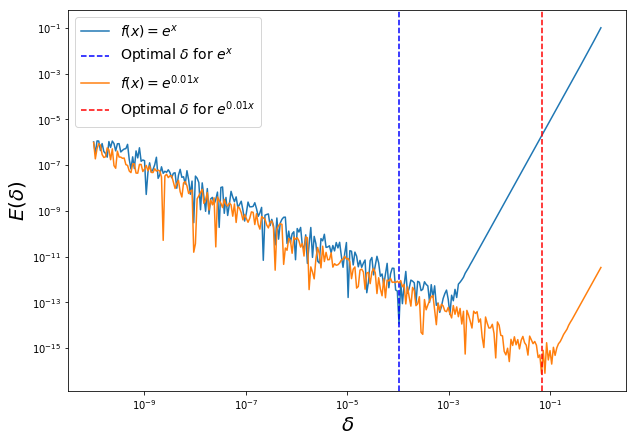

Minimum delta for f_1: 1.05e-04
Minimum delta for f_2: 6.75e-02


In [4]:
plt.figure(figsize=(10,7))
plt.loglog(δ,diff_1,label="$f(x) = e^x$")
plt.axvline(δ[np.argmin(diff_1)],c='b',ls='--',label="Optimal $\delta$ for $e^x$")
plt.loglog(δ,diff_2,label="$f(x) = e^{0.01x}$")
plt.axvline(δ[np.argmin(diff_2)],c='r',ls='--',label="Optimal $\delta$ for $e^{0.01x}$")
plt.ylabel("$E(\delta)$",fontsize=20)
plt.xlabel("$\delta$",fontsize=20)
plt.legend(fontsize=14)
plt.show()
print("Minimum delta for f_1: %.2e" % (δ[np.argmin(diff_1)]))
print("Minimum delta for f_2: %.2e" % (δ[np.argmin(diff_2)]))

We can clearly see the minimum of the error occurs arround our appropriate estimations of $\delta$, plus or minus a little bit due to how the $\epsilon_i$ ended up rounding in reality! If you were to smooth the function, the minima would lie closer to our true estimation: particularly for the blue curve, note the value near $10^{-4}$ is quite an outlier, and in reality the minimum looks to be around $10^{-3}$ if the function were smoothed.

### Problem 2

For this problem, we want to interpolate temperature as a function of voltage. In the provided file `lakeshore.txt`, we are given $T$  (ordered from small to large) in the first column, $V$ in the second column, and $dT/dV$ in the third column. Let's start by loading in the data and taking a look at what we have.

In [5]:
# Load data
data = np.loadtxt("lakeshore.txt")
# Variables for appropriate columns
T = data[:,0]
V = data[:,1]
dTdV = data[:,2]

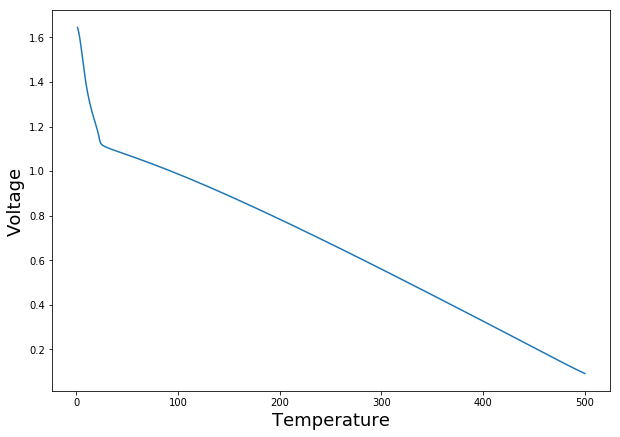

In [6]:
# Make a basic plot to see what the data looks like
plt.figure(figsize=(10,7))
plt.plot(T,V)
plt.xlabel("Temperature",fontsize=18)
plt.ylabel("Voltage",fontsize=18)
plt.show()

Alright, cool! Now to do an interpolation, recall we want to interpolate $T$ as a function of $V$. So, let's re-organize our data so that we have voltages ordered from smallests to largest with corresponding temperatures. Since this data is monotonic, that means we can just reverse the order of the data.

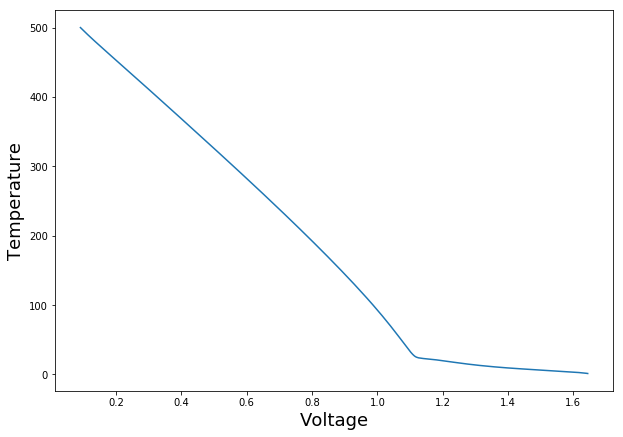

In [7]:
# Flip the data to do T as a function of V
T = np.flip(T)
V = np.flip(V)
dTdV = np.flip(dTdV)
# Another basic plot
plt.figure(figsize=(10,7))
plt.plot(V,T)
plt.xlabel("Voltage",fontsize=18)
plt.ylabel("Temperature",fontsize=18)
plt.show()

Great. Now, we can interpolate using `scipy`'s cubic spline interpolation as you've seen in class. This will give a function that interpolates $T$ given a $V$!

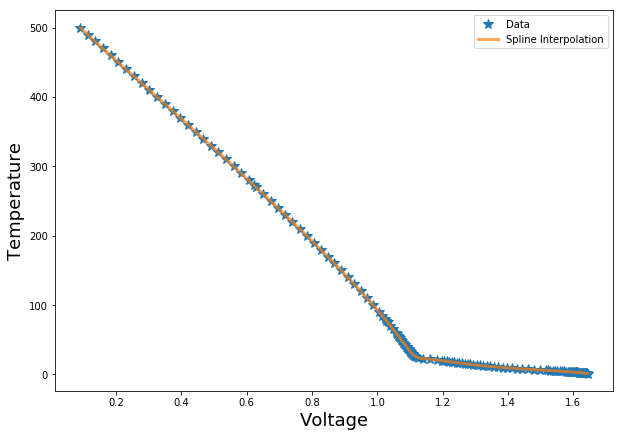

In [8]:
from scipy import interpolate
# Make the interpolation function
spline = interpolate.CubicSpline(V,T)
# Test out the interpolation
test_V = np.linspace(V.min(),V.max(),1000)
interpolated_T = spline(test_V)

# Make a plot of the data and the fit to see how it does
plt.figure(figsize=(10,7))
plt.plot(V,T,'*',label="Data",markersize=10)
plt.plot(test_V,interpolated_T,label="Spline Interpolation",lw=3,alpha=0.7)
plt.xlabel("Voltage",fontsize=18)
plt.ylabel("Temperature",fontsize=18)
plt.legend()
plt.show()

Fantastic, now we have a function `spline` which returns a $T$ given a $V$. Now to estimate the error on this fit, we will use the bootstrap method. This method characterizes error in a fit by resampling the data, and then refitting the spline interpolation. This way, we can see how our spline fit does at the points that are missing in our resample, and the difference between the fit and the value gives us an estimate of our error.

In [9]:
# I will choose to resample indices, so I can know which indices were not sampled
# and test the data at those indices against the spline fit
inds = np.arange(0, len(V))
# Now let's try resampling once
sample = np.sort(np.random.choice(inds, size=int(len(inds)/2), replace=False))
not_in_sample = inds[~np.isin(inds,sample)]
# Make the spline fit with the bootstrapped sample
spline_boot = interpolate.CubicSpline(V[sample],T[sample])
spline_boot_vals = spline_boot(V)

Now let's compare our spline fit with the bootstrapped sample to the data

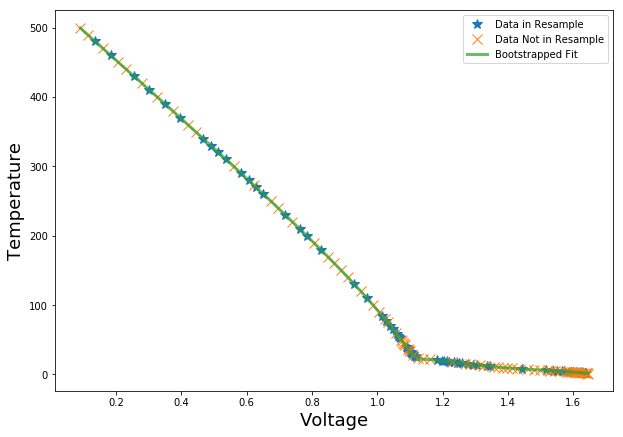

In [10]:
plt.figure(figsize=(10,7))
plt.plot(V[sample],T[sample],'*',label="Data in Resample",markersize=10)
plt.plot(V[not_in_sample],T[not_in_sample],'x',label="Data Not in Resample",markersize=10)
plt.plot(V,spline_boot_vals,label="Bootstrapped Fit",lw=3,alpha=0.7)
plt.xlabel("Voltage",fontsize=18)
plt.ylabel("Temperature",fontsize=18)
plt.legend()
plt.show()

Looks pretty similar, let's plot the error comparing our bootstrapped fit to the data not in the resample.

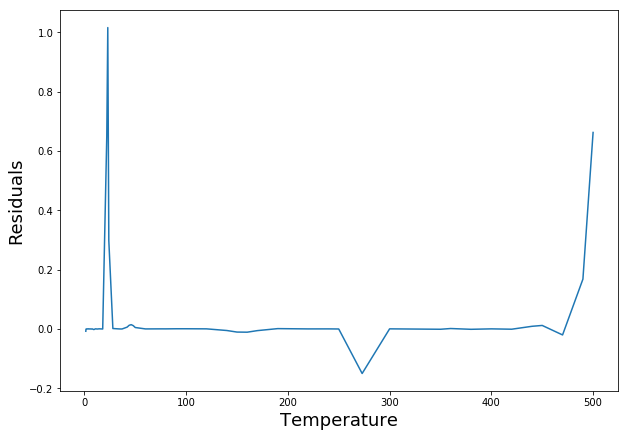

Average Error: 0.04300106656307464


In [11]:
plt.figure(figsize=(10,7))
resid = T[not_in_sample] - spline_boot_vals[not_in_sample]
plt.plot(T[not_in_sample], resid)
plt.ylabel("Residuals",fontsize=18)
plt.xlabel("Temperature",fontsize=18)
plt.show()
print("Average Error: {}".format(np.mean(np.abs(resid))))

Alright, so we have a rough average error for our fit! If we wanted to do an even better job, we could bootstrap resample many times, and make a distribution of values for each temperature interpolation, but since we only need a rough estimate for this problem we will stop here.

### Problem 3

In this problem, we can use the recursive function developed in class by Prof. Sievers as our base. I've pasted the code from class below for reference. You can also find it here: https://github.com/sievers/phys512/blob/master/lecture_3/integrate_vary_step.py. We can be more efficient than this! The current function calls the function it's integrating multiple times for the same input. We can use the glory of recursion to save intermediate function calls to prevent this from happening. There are other ways of doing this too, but here a form of the Adaptive Simpson's Method is presented as a solution to this problem (https://en.wikipedia.org/wiki/Adaptive_Simpson%27s_method). 

In [37]:
# Sievers' Simple Integrator

def simple_integrate(fun,a,b,tol):
    x=np.linspace(a,b,5)
    y=fun(x)
    neval=len(x) #let's keep track of function evaluations
    f1=(y[0]+4*y[2]+y[4])/6.0*(b-a)
    f2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/12.0*(b-a)
    myerr=np.abs(f2-f1)
    if (myerr<tol):
        #return (f2)/1.0,myerr,neval
        return (16.0*f2-f1)/15.0,myerr,neval
    else:
        mid=0.5*(b+a)
        f_left,err_left,neval_left=simple_integrate(fun,a,mid,tol/2.0)
        f_right,err_right,neval_right=simple_integrate(fun,mid,b,tol/2.0)
        neval=neval+neval_left+neval_right
        f=f_left+f_right
        err=err_left+err_right
        return f,err,neval

In [40]:
# Our Better Integrator

def better_integrate(fun, a, b, tol, neval=0, fa='', fb='', fm=''):
    x=np.linspace(a, b, 5)
    if neval == 0:
        y=fun(x)
        fa = y[0]
        fm = y[2]
        fb = y[4]
        fm_left = y[1]
        fm_right = y[3]
        neval=len(x) 
    else:
        fm_left = fun(x[1])
        fm_right = fun(x[3])
        neval=2
    f1=(fa+4*fm+fb)/6.0*(b-a)
    f2=(fa+4*fm_left+2*fm+4*fm_right+fb)/12.0*(b-a)
    myerr=np.abs(f2-f1)
    if (myerr<tol):
        return (16.0*f2-f1)/15.0, myerr, neval
    else:
        mid=0.5*(b+a)
        f_left, err_left, neval_left = better_integrate(fun, a, mid, tol/2.0, neval, fa, fm, fm_left)
        f_right, err_right, neval_right = better_integrate(fun, mid, b, tol/2.0, neval, fm, fb, fm_right)
        neval= neval + neval_left + neval_right
        f = f_left + f_right
        err = err_left + err_right
        return f, err, neval

In [72]:
# Let's compare the number of function evaluations between our function and Sievers' with a few examples:

def fun1(x):
    return 1.0/(1.0+x**2)

def fun2(x, sig=1):
    return 1.0+np.exp(-0.5*x**2/(sig**2))

def fun3(x):
    return np.sin(x)

def fun4(x):
    return 3**(x)

def fun5(x):
    return np.sin(x**4)*x

funs = [fun1, fun2, fun3, fun4, fun5]
funs_strings = ["1.0/(1.0+x**2)", "1.0+np.exp(-0.5*x**2/(sig**2))", "np.sin(x)", "3**(x)", "np.sin(x**4)*x"]
limits = [(-1, 1), (-2, 2), (-1, 2), (0, np.pi), (0.5, 1.5)]

for fun, fun_string, lim in zip(funs, funs_strings, limits):
    f_better, err_better, neval_better = better_integrate(fun, lim[0], lim[1], 1e-3)
    f_simple, err_simple, neval_simple = simple_integrate(fun, lim[0], lim[1], 1e-3)
    print("For the function, {}, integrated between {},".format(fun_string, lim))
    print("better_integrate uses {} function evaluations while simple_integrate used {}.".format((neval_better),(neval_simple)))
    print("Our method, better_integrate, saved {} function calls. \n \n".format(neval_simple-neval_better))
#     print("err_better = {}, err_simple = {}".format((err_better), (err_simple)))
#     print("f_better = {}, f_simple = {}".format((f_better), (f_simple)))
    

For the function, 1.0/(1.0+x**2), integrated between (-1, 1),
better_integrate uses 17 function evaluations while simple_integrate used 35.
Our method, better_integrate, saved 18 function calls. 
 

For the function, 1.0+np.exp(-0.5*x**2/(sig**2)), integrated between (-2, 2),
better_integrate uses 33 function evaluations while simple_integrate used 75.
Our method, better_integrate, saved 42 function calls. 
 

For the function, np.sin(x), integrated between (-1, 2),
better_integrate uses 17 function evaluations while simple_integrate used 35.
Our method, better_integrate, saved 18 function calls. 
 

For the function, 3**(x), integrated between (0, 3.141592653589793),
better_integrate uses 29 function evaluations while simple_integrate used 65.
Our method, better_integrate, saved 36 function calls. 
 

For the function, np.sin(x**4)*x, integrated between (0.5, 1.5),
better_integrate uses 29 function evaluations while simple_integrate used 65.
Our method, better_integrate, saved 36 func

### Problem 4

You made it to the last problem in the first problem set! Woo hoo!

In this problem, we'll use our (better) integrator from problem 3 to solve an E&M problem. This isn't an E&M class so I won't solve the problem explicitly and will just present the solution. However, do check out example 2 from the follow Physics Pages link to see the derivation: https://physicspages.com/pdf/Griffiths%20EM/Griffiths%20Problems%2002.06-08.pdf.

$$E = \frac{\sigma}{4\pi\epsilon_0} \int_0^{\pi} \frac{(z-Rcos\theta)(2\pi R sin \theta)(R d \theta)}{(z^2 + R^2 -2zRcos\theta)^{3/2}}$$

We have to be careful around $z=R$ and note the singularity. Our recursive step integrator will fail at z=R. However, using scipy.integrate.quad, we can avoid this problem and it takes care of it for us. 

In [86]:
from scipy import integrate

sig = 5.67e-8 
eps = 8.854e-12 
zarr = np.linspace(0, 2, 101)
R = 1
const = sig/(4*np.pi*eps)

# Make sure that z = R is in our z array!
print(R in zarr)

def E(z, R):
    # This function returns a lambda function with specified R and Z values
    return lambda theta: const * ((z-R*np.cos(theta))*(2*np.pi*R*np.sin(theta))*(R))/(z**2 + R**2 - 2*z*R*np.cos(theta))**(3/2)
    

True


In [87]:
# Let's first try the two integrators (quad and ours) when z = R
try:
    integrate.quad(E(R, R), 0, np.pi)[0] 
except:
    print("The quad integrator couldn't handle the singularity.")

try:
    better_integrate(E(R, R), 0, np.pi, 1e-3)[0]
except:
    print("Our integrator couldn't handle the singularity.")

Our integrator couldn't handle the singularity.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


There is a singularity in our integral at z=R since at $\theta = 0$ or $\pi$, our denominator will be  equal to 0. Our integrator does care about the singularity. We face a recursion depth error when we integrate at z=R. We avoid this by setting that value to 0, rather than integrating at that z value.

Text(0.5, 1.0, 'E-field when R = 50')

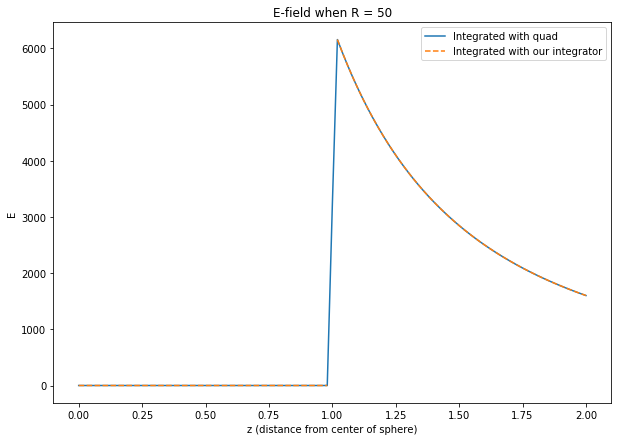

In [88]:
Earr_quad = []
Earr_ours = []

for z in zarr:
    Earr_quad.append(integrate.quad(E(z, R), 0, np.pi)[0])
    if z==R:
        Earr_ours.append(float('nan'))
    else:
        Earr_ours.append(better_integrate(E(z, R), 0, np.pi, 1e-3)[0])

plt.figure(figsize=(10,7))
plt.plot(zarr, Earr_quad, label="Integrated with quad")
plt.plot(zarr, Earr_ours, label="Integrated with our integrator", ls='--')
plt.legend(loc=0)
plt.xlabel("z (distance from center of sphere)")
plt.ylabel("E")
plt.title("E-field when R = 50")